In [ ]:
"""
%      1. loc             : numeric % McCabe's line count of code
%      2. v(g)            : numeric % McCabe "cyclomatic complexity"
%      3. ev(g)           : numeric % McCabe "essential complexity"
%      4. iv(g)           : numeric % McCabe "design complexity"
%      5. n               : numeric % Halstead total operators + operands
%      6. v               : numeric % Halstead "volume"
%      7. l               : numeric % Halstead "program length"
%      8. d               : numeric % Halstead "difficulty"
%      9. i               : numeric % Halstead "intelligence"
%     10. e               : numeric % Halstead "effort"
%     11. b               : numeric % Halstead 
%     12. t               : numeric % Halstead's time estimator
%     13. lOCode          : numeric % Halstead's line count
%     14. lOComment       : numeric % Halstead's count of lines of comments
%     15. lOBlank         : numeric % Halstead's count of blank lines
%     16. lOCodeAndComment: numeric
%     17. uniq_Op         : numeric % unique operators
%     18. uniq_Opnd       : numeric % unique operands
%     19. total_Op        : numeric % total operators
%     20. total_Opnd      : numeric % total operands
%     21: branchCount     : numeric % of the flow graph
%     22. defects         : {false,true} % module has/has not one or more 
%                                        % reported defects
"""

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import urllib.request
import io

In [5]:
#За допомогою io.StringIO() створюю файлоподібний об'єкт, щоб arff.loadarff міг його розпізнати і правильно прочитати
url = "http://promise.site.uottawa.ca/SERepository/datasets/jm1.arff"
ftpstr = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstr.read().decode('utf-8')))
print("Кількість рядків:",len(data))
print("Кількість стовпців:",len(data[0]))

Кількість рядків: 10885
Кількість стовпців: 22


In [6]:
def dataF (data):
  df = pd.DataFrame(data)
  df = df.dropna()
  df = df.replace(b'false', 0)
  df = df.replace(b'true', 1)
  return (df)

df = dataF(data)
print(df)

         loc  v(g)  ev(g)  iv(g)      n        v     l      d       i  \
0        1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30   
1        1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00   
2       72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85   
3      190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87   
4       37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86   
...      ...   ...    ...    ...    ...      ...   ...    ...     ...   
10880   18.0   4.0    1.0    4.0   52.0   241.48  0.14   7.33   32.93   
10881    9.0   2.0    1.0    2.0   30.0   129.66  0.12   8.25   15.72   
10882   42.0   4.0    1.0    2.0  103.0   519.57  0.04  26.40   19.68   
10883   10.0   1.0    1.0    1.0   36.0   147.15  0.12   8.44   17.44   
10884   19.0   3.0    1.0    1.0   58.0   272.63  0.09  11.57   23.56   

              e  ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  \
0          1.30  ...     2.0        2.0    

In [7]:
#Кількість спостережень різних параметрів "defects"
df['defects'].value_counts()

0    8777
1    2103
Name: defects, dtype: int64

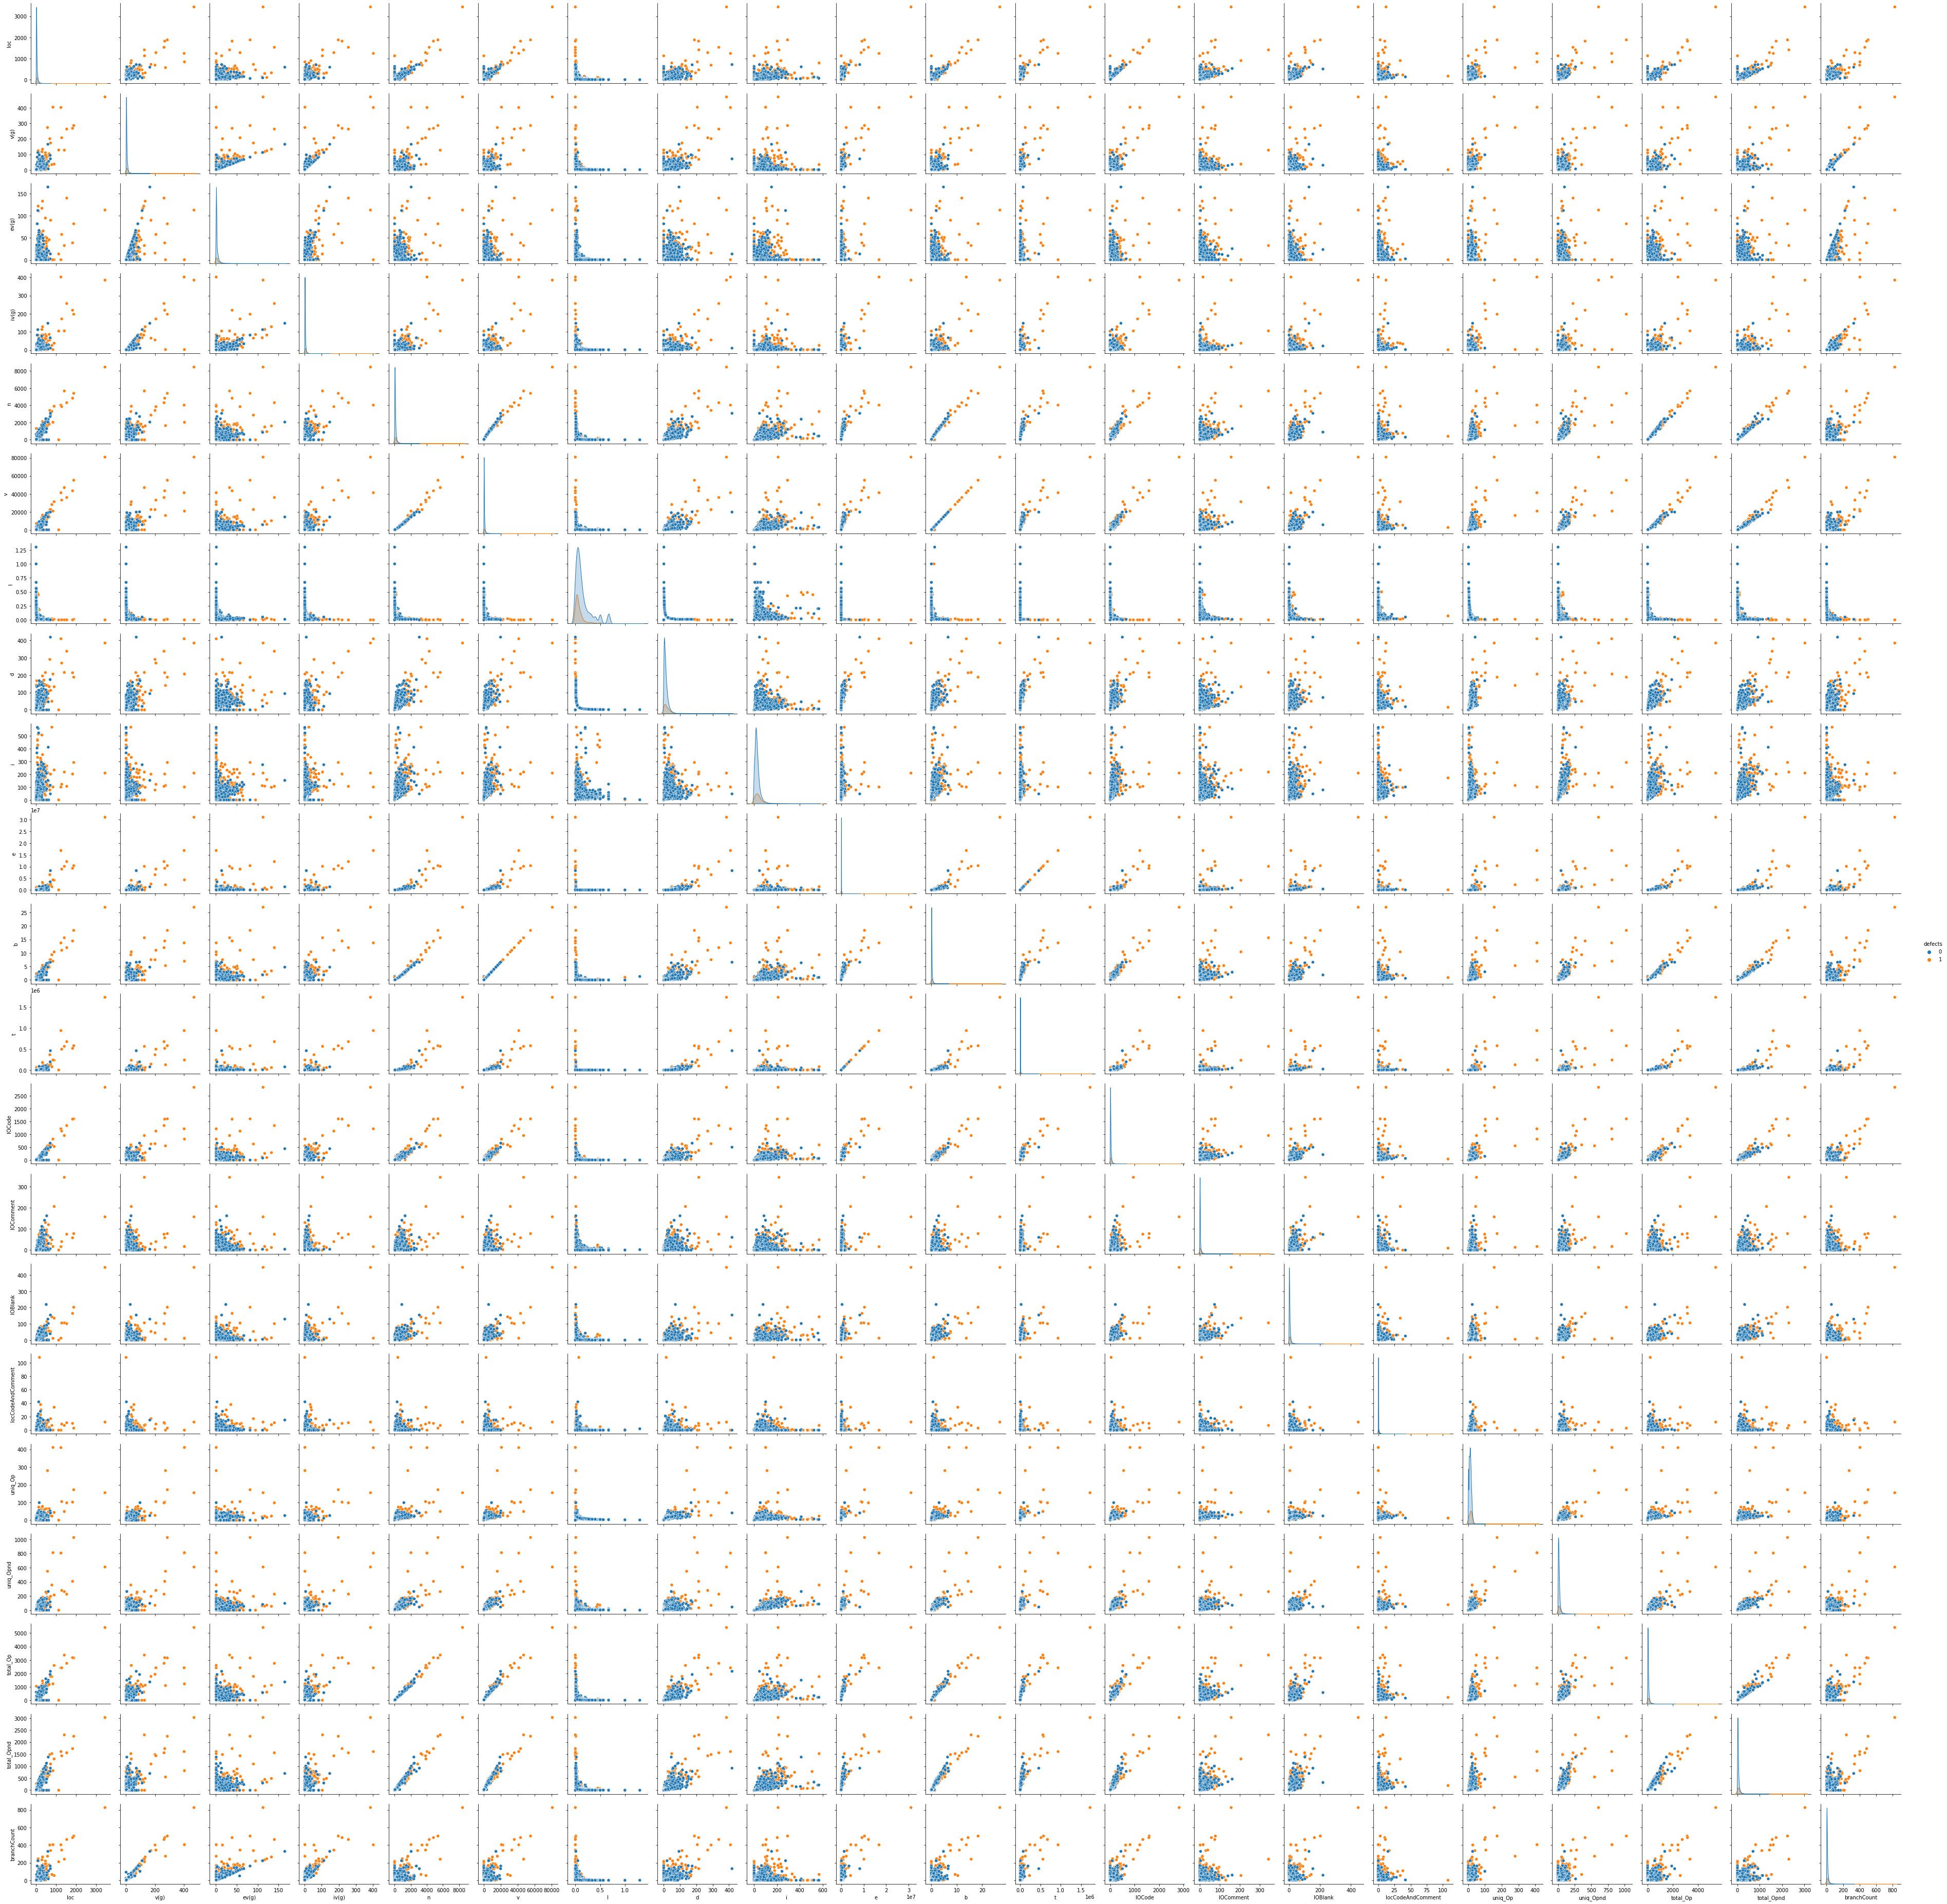

In [10]:
sns.pairplot(df, hue ='defects')

In [13]:
import plotly.express as px

figure = px.scatter_3d(df, x ='b', y = 'n', z = 'n', color = 'defects')
figure.show()

In [16]:
df_good = df[(df.b < 7.53) & (df.n < 2869)]
print(df_good)
df_good['defects'].value_counts()

         loc  v(g)  ev(g)  iv(g)      n        v     l      d       i  \
0        1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30   
1        1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00   
2       72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85   
3      190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87   
4       37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86   
...      ...   ...    ...    ...    ...      ...   ...    ...     ...   
10880   18.0   4.0    1.0    4.0   52.0   241.48  0.14   7.33   32.93   
10881    9.0   2.0    1.0    2.0   30.0   129.66  0.12   8.25   15.72   
10882   42.0   4.0    1.0    2.0  103.0   519.57  0.04  26.40   19.68   
10883   10.0   1.0    1.0    1.0   36.0   147.15  0.12   8.44   17.44   
10884   19.0   3.0    1.0    1.0   58.0   272.63  0.09  11.57   23.56   

              e  ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  \
0          1.30  ...     2.0        2.0    

0    8776
1    2092
Name: defects, dtype: int64